In [9]:
import numpy as np 

import pandas as pd 

import datetime 


In [10]:
dates = pd.date_range(start = '2005-01-01', end = '2009-12-31')
dates 

DatetimeIndex(['2005-01-01', '2005-01-02', '2005-01-03', '2005-01-04',
               '2005-01-05', '2005-01-06', '2005-01-07', '2005-01-08',
               '2005-01-09', '2005-01-10',
               ...
               '2009-12-22', '2009-12-23', '2009-12-24', '2009-12-25',
               '2009-12-26', '2009-12-27', '2009-12-28', '2009-12-29',
               '2009-12-30', '2009-12-31'],
              dtype='datetime64[ns]', length=1826, freq='D')

In [11]:
rainfall = np.random.poisson(lam = 5, size = len(dates)) 
rainfall 

array([3, 5, 4, ..., 1, 5, 7])

In [12]:
list(range(2, 5))

[2, 3, 4]

In [13]:
# crear los casos artificiales de dengue

cases = np.random.poisson(lam = 2, size = len(dates)) 

for i in range(30, len(cases)): 
    cases[i] += int(0.3*rainfall[i-30])

In [14]:
cases 

array([0, 1, 1, ..., 2, 2, 5])

In [15]:
data = pd.DataFrame({'Fecha': dates, 'Lluvia': rainfall, 'Casos_Dengue': cases} )



data.to_csv('datos_artiviciales_fecha_lluvia_dengue.csv', index = False)

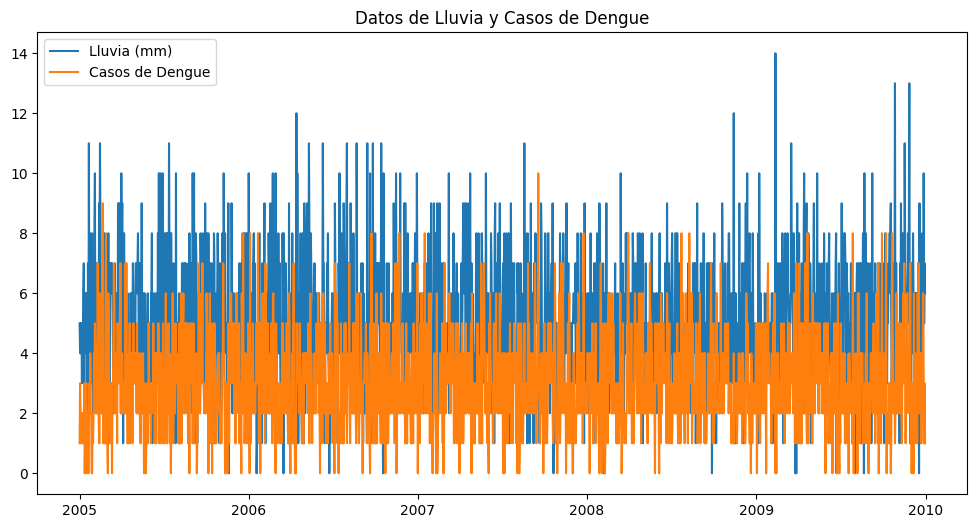

/home/marco/Documentos/investigacion/didactica_ciencia_datos/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/marco/Documentos/investigacion/didactica_ciencia_datos/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


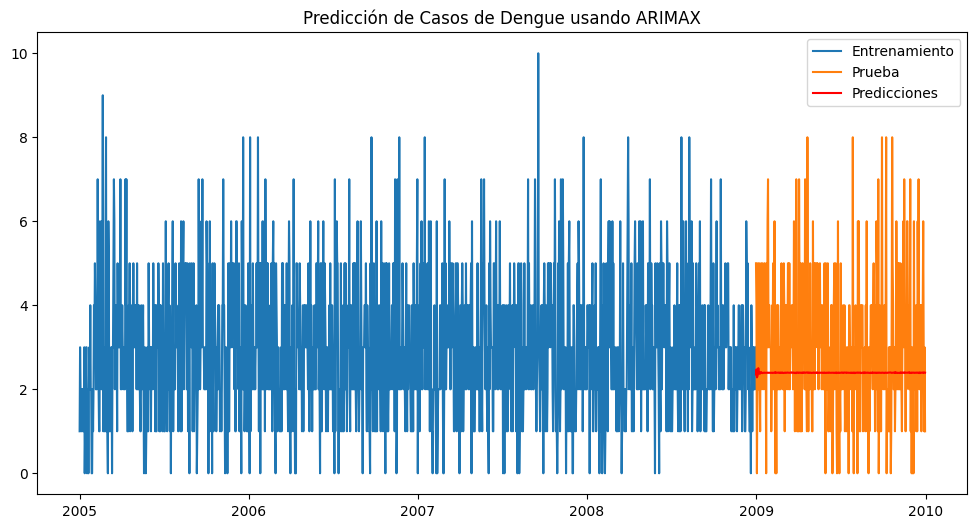

Error cuadrático medio: 3.29


In [17]:
# Librerías necesarias para crear una serie de tiempo artificial.
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Generar un rango de fechas diarias
dates = pd.date_range(start="2005-01-01", end="2009-12-31", freq='D')

# Generar datos de lluvia aleatorios
np.random.seed(42)
rainfall = np.random.poisson(lam=5, size=len(dates))  # Media de 5 mm de lluvia diaria

# Generar datos de casos de dengue con cierto retraso
cases = np.random.poisson(lam=2, size=len(dates))
for i in range(30, len(cases)):
    cases[i] += int(0.3 * rainfall[i-30])  
    # Supongamos que el 30% de la lluvia afecta los casos de dengue 30 días después

# Crear un DataFrame
data = pd.DataFrame({'Fecha': dates, 'Lluvia': rainfall, 'Casos_Dengue': cases})

# Guardar el DataFrame como archivo .csv
data.to_csv('dataset_dengue_lluvia.csv', index=False)

# Cargar el dataset
data = pd.read_csv('dataset_dengue_lluvia.csv', parse_dates=['Fecha'], index_col='Fecha')

# Visualización de los datos
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Lluvia'], label='Lluvia (mm)')
plt.plot(data.index, data['Casos_Dengue'], label='Casos de Dengue')
plt.legend()
plt.title('Datos de Lluvia y Casos de Dengue')
plt.show()

# Seleccionar la serie temporal de los casos de dengue y la variable exógena (lluvia)
dengue_cases = data['Casos_Dengue']
rainfall = data['Lluvia']

# Dividir los datos en entrenamiento y prueba
train_size = int(len(dengue_cases) * 0.8)
train_cases, test_cases = dengue_cases[:train_size], dengue_cases[train_size:]
train_rain, test_rain = rainfall[:train_size], rainfall[train_size:]

# Ajustar el modelo ARIMAX (p, d, q) = (5, 1, 0)
model = SARIMAX(train_cases, order=(5, 1, 0), exog=train_rain)
model_fit = model.fit(disp=False)

# Realizar predicciones
predictions = model_fit.forecast(steps=len(test_cases), exog=test_rain)

# Visualización de los resultados
plt.figure(figsize=(12, 6))
plt.plot(train_cases.index, train_cases.values, label='Entrenamiento')
plt.plot(test_cases.index, test_cases.values, label='Prueba')
plt.plot(test_cases.index, predictions, label='Predicciones', color='red')
plt.legend()
plt.title('Predicción de Casos de Dengue usando ARIMAX')
plt.show()

# Evaluación del modelo
mse = mean_squared_error(test_cases, predictions)
print(f'Error cuadrático medio: {mse:.2f}')


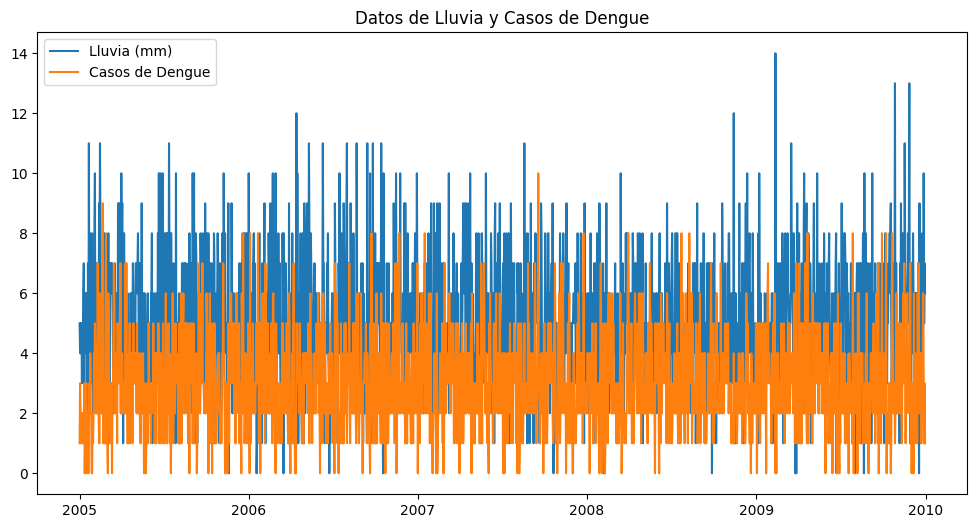

/home/marco/Documentos/investigacion/investigacion_d/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/marco/Documentos/investigacion/investigacion_d/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/marco/Documentos/investigacion/investigacion_d/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/marco/Documentos/investigacion/investigacion_d/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Mejor orden ARIMA: (3, 1, 4)


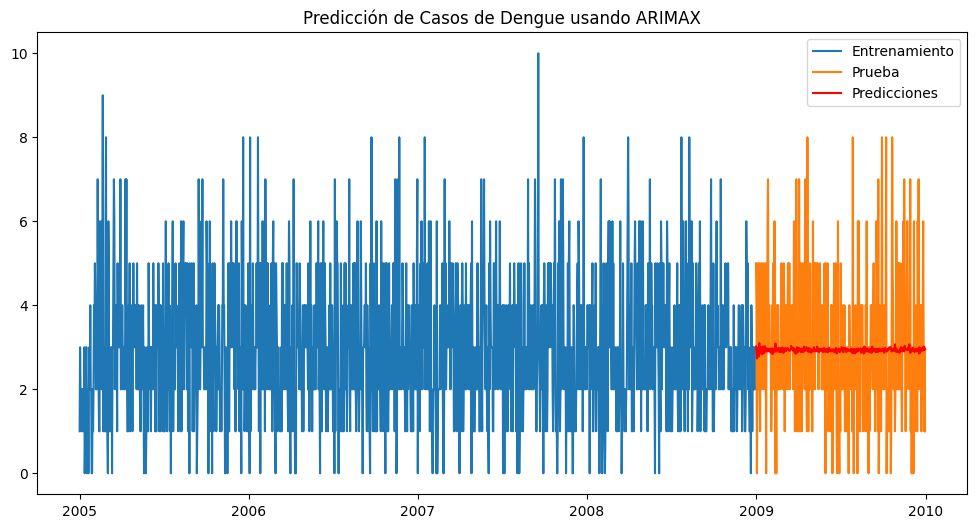

Error cuadrático medio: 2.88


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Cargar el dataset
data = pd.read_csv('dataset_dengue_lluvia.csv', parse_dates=['Fecha'], index_col='Fecha')

# Visualización de los datos
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Lluvia'], label='Lluvia (mm)')
plt.plot(data.index, data['Casos_Dengue'], label='Casos de Dengue')
plt.legend()
plt.title('Datos de Lluvia y Casos de Dengue')
plt.show()

# Seleccionar la serie temporal de los casos de dengue y la variable exógena (lluvia)
dengue_cases = data['Casos_Dengue']
rainfall = data['Lluvia']

# Dividir los datos en entrenamiento y prueba
train_size = int(len(dengue_cases) * 0.8)
train_cases, test_cases = dengue_cases[:train_size], dengue_cases[train_size:]
train_rain, test_rain = rainfall[:train_size], rainfall[train_size:]

# Función para buscar los mejores parámetros ARIMA
def find_best_arima_params(train_cases, train_rain):
    best_aic = np.inf
    best_order = None
    best_model = None
    
    for p in range(0, 6):
        for d in range(0, 2):
            for q in range(0, 6):
                try:
                    model = SARIMAX(train_cases, order=(p, d, q), exog=train_rain)
                    model_fit = model.fit(disp=False)
                    if model_fit.aic < best_aic:
                        best_aic = model_fit.aic
                        best_order = (p, d, q)
                        best_model = model_fit
                except:
                    continue
    return best_order, best_model

# Encontrar los mejores parámetros ARIMA
best_order, best_model = find_best_arima_params(train_cases, train_rain)
print(f'Mejor orden ARIMA: {best_order}')

# Realizar predicciones con el mejor modelo
predictions = best_model.forecast(steps=len(test_cases), exog=test_rain)

# Visualización de los resultados
plt.figure(figsize=(12, 6))
plt.plot(train_cases.index, train_cases.values, label='Entrenamiento')
plt.plot(test_cases.index, test_cases.values, label='Prueba')
plt.plot(test_cases.index, predictions, label='Predicciones', color='red')
plt.legend()
plt.title('Predicción de Casos de Dengue usando ARIMAX')
plt.show()

# Evaluación del modelo
mse = mean_squared_error(test_cases, predictions)
print(f'Error cuadrático medio: {mse:.2f}')
